<a href="https://colab.research.google.com/github/sakshimohta/Stock-market-prediction/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tesla datasets.csv to tesla datasets.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/tesla datasets.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.shape


(2416, 7)

In [ ]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


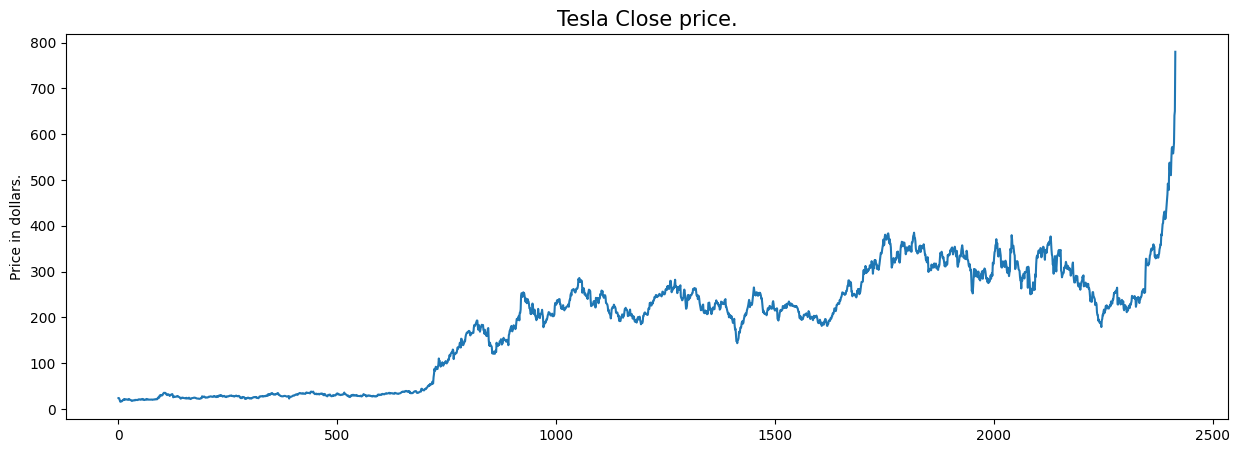

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [ ]:
df = df.drop(['Adj Close'], axis=1)
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


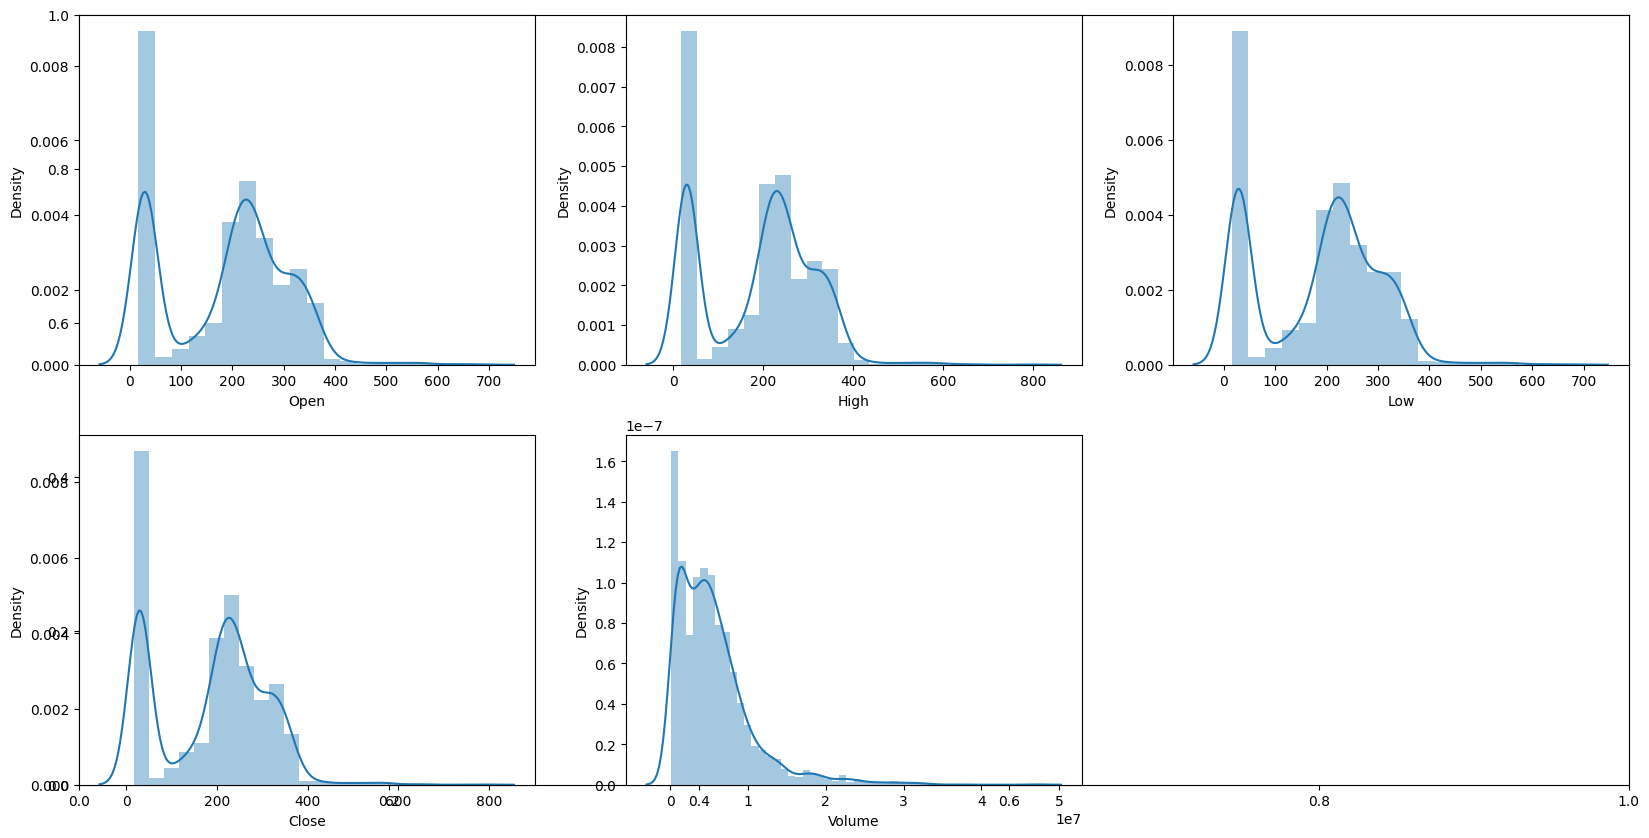

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sb.distplot(df[col])
plt.show()


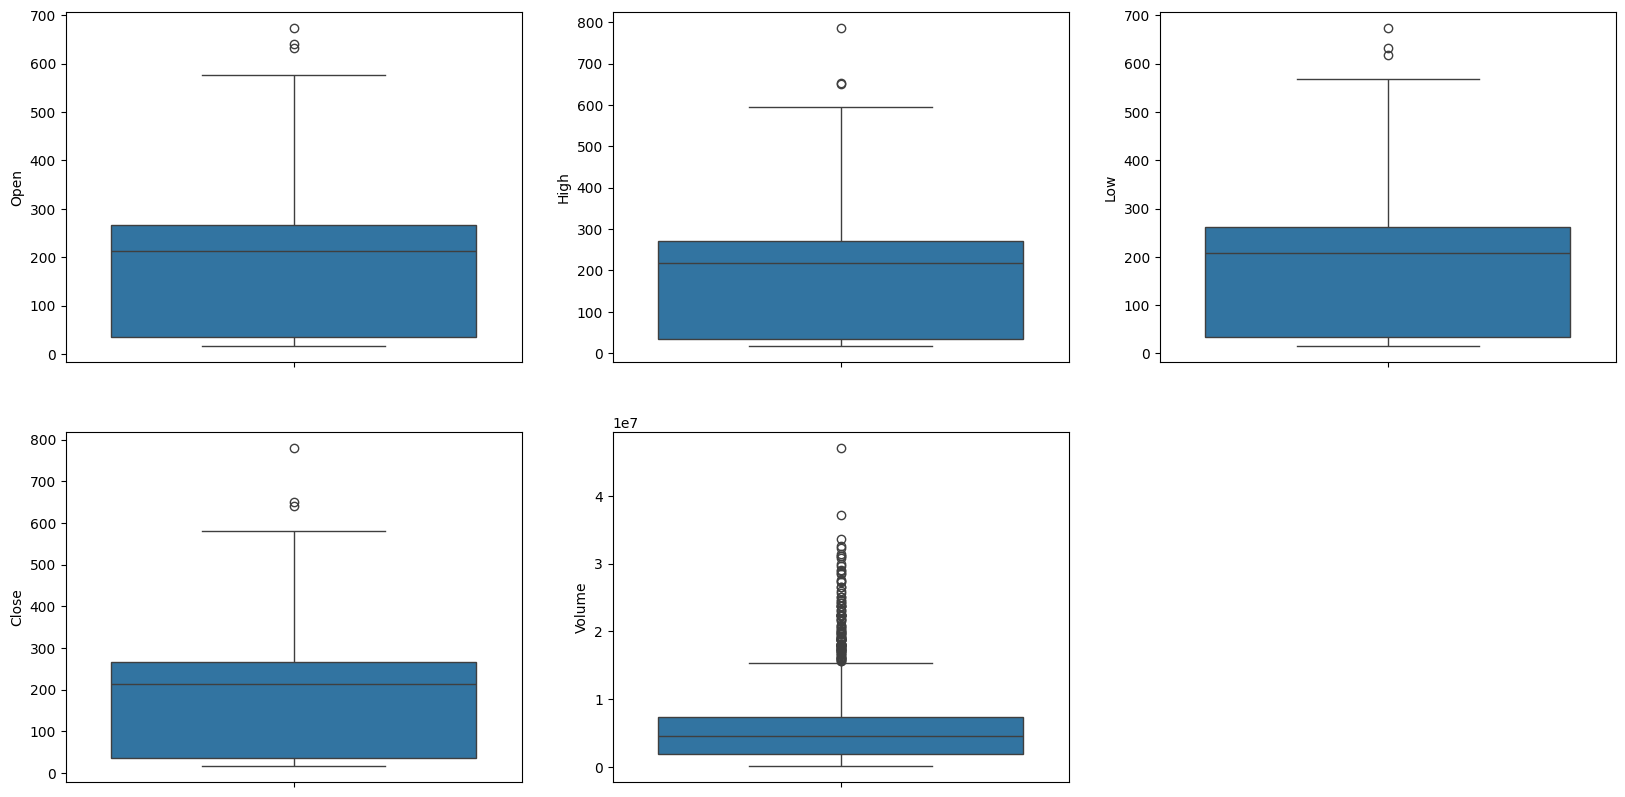

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sb.boxplot(df[col])
plt.show()


In [ ]:
import pandas as pd

try:
    splitted = df['Date'].str.split('/', expand=True)
    df['day'] = pd.to_numeric(splitted[1], errors='coerce')
    df['month'] = pd.to_numeric(splitted[0], errors='coerce')
    df['year'] = pd.to_numeric(splitted[2], errors='coerce')
except Exception as e:
    print("An error occurred:", e)

df.head()



In [ ]:
import pandas as pd
import numpy as np

# Assuming 'Date' is a column in your DataFrame 'df'
df['month'] = pd.to_datetime(df['Date']).dt.month
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
df.head()



,Date,Open,High,Low,Close,Volume,day,is_quarter_end,year,date,month
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,NaN,1,2010,2010,6
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,NaN,1,2010,2010,6
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,NaN,0,2010,2010,7
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,NaN,0,2010,2010,7
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,NaN,0,2010,2010,7


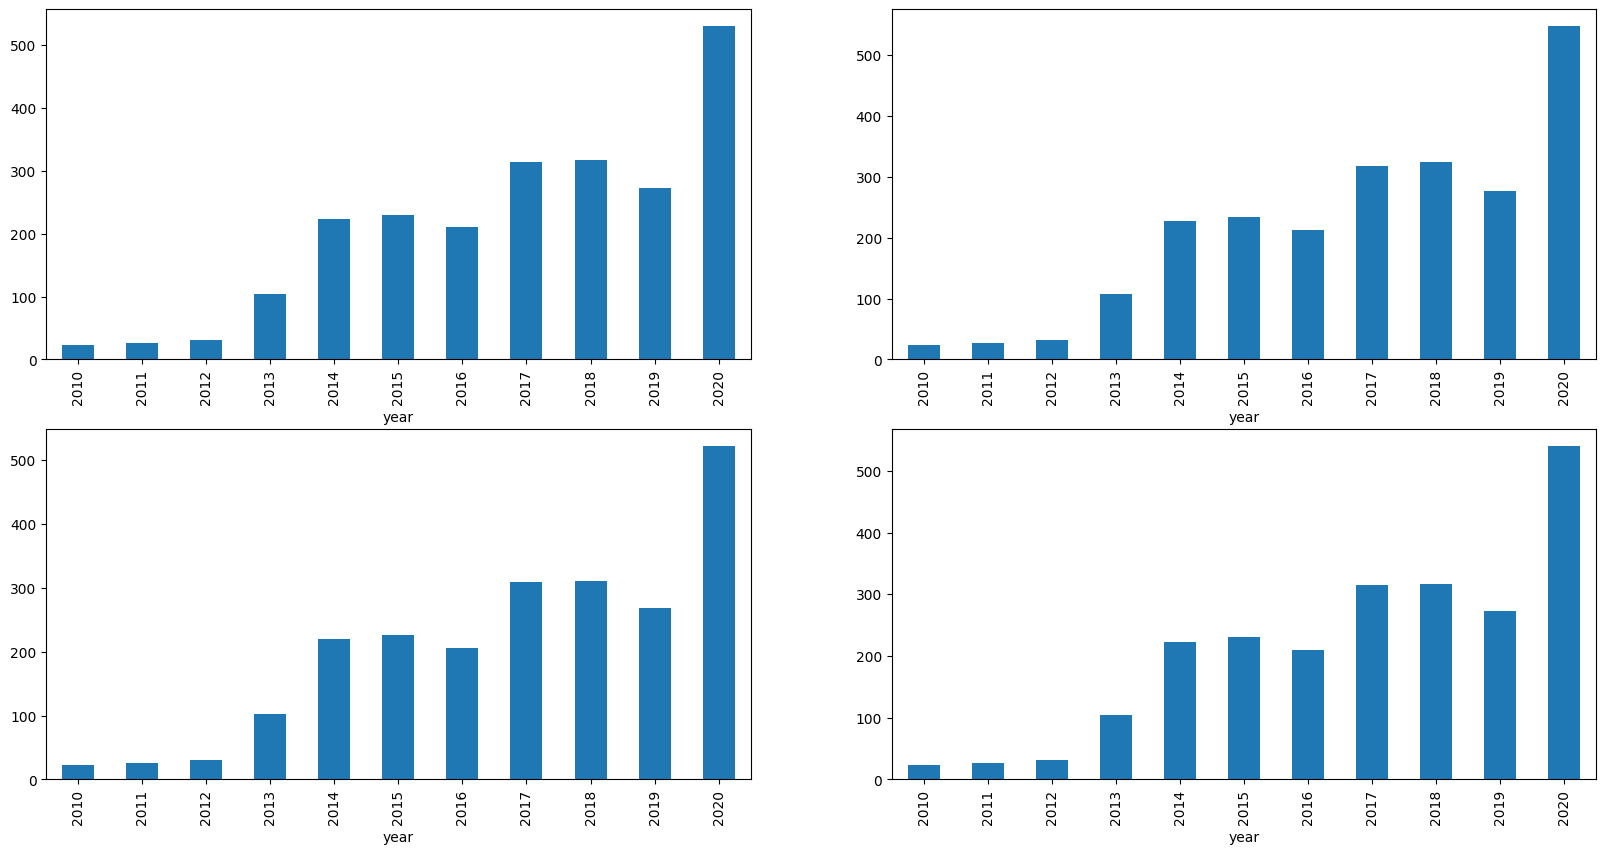

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Date' is a column in your DataFrame 'df'
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['year'] = df['Date'].dt.year

# Group by 'year' and calculate mean
data_grouped = df.groupby('year').mean()

plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()

plt.show()



In [ ]:
df.groupby('is_quarter_end').mean()


,Date,Open,High,Low,Close,Volume,day,year,date,month
is_quarter_end,,,,,,,,,,
0,2015-04-15 12:01:46.930693120,185.875081,189.254226,182.449499,186.085081,5.767062e+06,NaN,2014.816213,2014.816213,6.173886
1,2015-04-15 09:25:12.000000000,187.071200,190.232700,183.860262,187.047163,5.180154e+06,NaN,2014.697500,2014.697500,7.597500


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


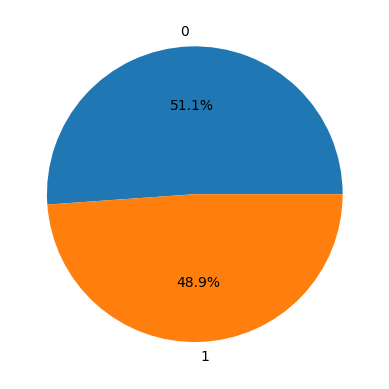

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


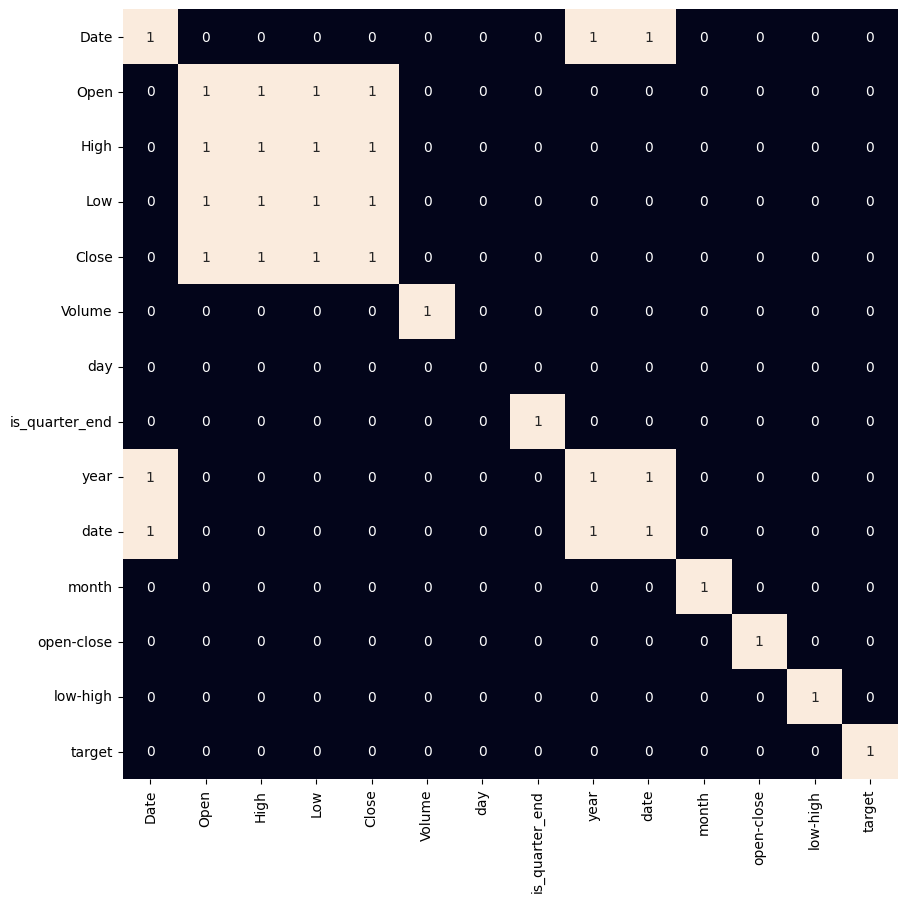

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [ ]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9382749759754802
Validation Accuracy :  0.4496784345922277



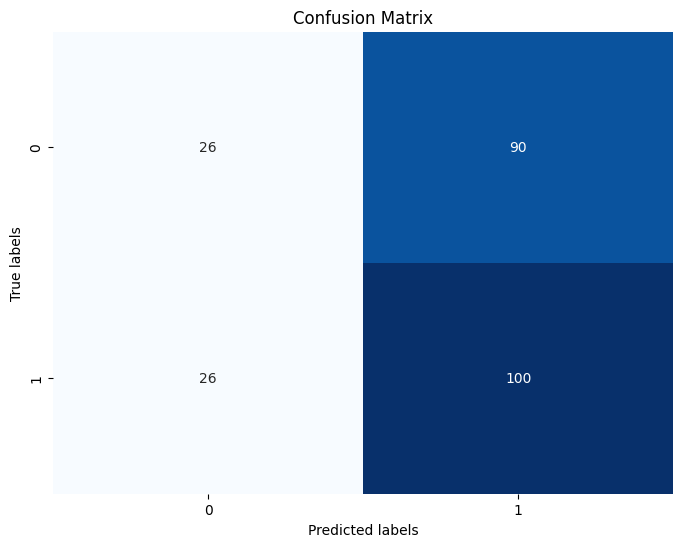

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming models[0], X_valid, and Y_valid are correctly defined
# Assuming Y_pred_valid contains the predicted labels for X_valid
Y_pred_valid = models[0].predict(X_valid)

# Compute confusion matrix
cm = confusion_matrix(Y_valid, Y_pred_valid)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


